In [1]:
import pandas as pd
file = 'flight_edges.tsv'
csv = pd.read_csv(file, sep='\t', header=None)

In [2]:
df = pd.DataFrame(csv)
df = df.rename(columns={0: 'Origin Airport Code', 1: 'Destination Airport Code'})
df = df.rename(columns={2: 'Origin City', 3: 'Destination City', 4: 'Passengers', 5: 'Seats', 6: 'Flights', 7: 'Distance'})
df = df.rename(columns={8: 'Date (yyyymm) of Flight', 9: 'Origin Pop', 10: 'Destination Pop'})

In [3]:
df.head()

,Origin Airport Code,Destination Airport Code,Origin City,Destination City,Passengers,Seats,Flights,Distance,Date (yyyymm) of Flight,Origin Pop,Destination Pop
0,MHK,AMW,"Manhattan, KS","Ames, IA",21,30,1,254.0,200810,122049,86219
1,EUG,RDM,"Eugene, OR","Bend, OR",41,396,22,103.0,199011,284093,76034
2,EUG,RDM,"Eugene, OR","Bend, OR",88,342,19,103.0,199012,284093,76034
3,EUG,RDM,"Eugene, OR","Bend, OR",11,72,4,103.0,199010,284093,76034
4,MFR,RDM,"Medford, OR","Bend, OR",0,18,1,156.0,199002,147300,76034


In [4]:
df.shape

(3606803, 11)

In [5]:
df.loc[(df['Date (yyyymm) of Flight'] == 199011) & (df['Origin Airport Code'] == 'LAX' ) \
       & (df['Destination Airport Code'] == 'RNO'), :]

,Origin Airport Code,Destination Airport Code,Origin City,Destination City,Passengers,Seats,Flights,Distance,Date (yyyymm) of Flight,Origin Pop,Destination Pop
15161,LAX,RNO,"Los Angeles, CA","Reno, NV",1802,3584,28,390.0,199011,22585772,258859
15171,LAX,RNO,"Los Angeles, CA","Reno, NV",2915,7424,58,390.0,199011,22585772,258859
15172,LAX,RNO,"Los Angeles, CA","Reno, NV",46,148,1,390.0,199011,22585772,258859
15217,LAX,RNO,"Los Angeles, CA","Reno, NV",865,2700,30,390.0,199011,22585772,258859


In [6]:
summed_df = df.groupby(['Origin Airport Code', 'Destination Airport Code', 'Origin City', 'Destination City', \
                        'Distance', 'Date (yyyymm) of Flight', 'Origin Pop', 'Destination Pop'])\
                        ['Passengers', 'Seats', 'Flights'].agg(['sum']).reset_index()

In [7]:
summed_df.shape

(1154192, 11)

In [8]:
summed_df.loc[(summed_df['Date (yyyymm) of Flight'] == 199011)& (summed_df['Origin Airport Code'] == 'LAX' ) \
       & (summed_df['Destination Airport Code'] == 'RNO'), :]

,Origin Airport Code,Destination Airport Code,Origin City,Destination City,Distance,Date (yyyymm) of Flight,Origin Pop,Destination Pop,Passengers,Seats,Flights
,,,,,,,,,sum,sum,sum
599903,LAX,RNO,"Los Angeles, CA","Reno, NV",390.0,199011,22585772,258859,5628,13856,117


In [9]:
summed_df.columns = summed_df.columns.droplevel(1)
summed_df.head()

,Origin Airport Code,Destination Airport Code,Origin City,Destination City,Distance,Date (yyyymm) of Flight,Origin Pop,Destination Pop,Passengers,Seats,Flights
0,1B1,BDL,"Hudson, NY","Hartford, CT",58.0,200906,61618,1195998,1,8,1
1,ABE,ABE,"Allentown, PA","Allentown, PA",0.0,200102,748739,748739,50,149,1
2,ABE,ABE,"Allentown, PA","Allentown, PA",0.0,200104,748739,748739,75,149,1
3,ABE,ABE,"Allentown, PA","Allentown, PA",0.0,200105,748739,748739,73,149,1
4,ABE,ABE,"Allentown, PA","Allentown, PA",0.0,200106,748739,748739,145,298,2


In [10]:
summed_df.loc[(summed_df['Origin Airport Code'] == summed_df['Destination Airport Code']), :].head()

,Origin Airport Code,Destination Airport Code,Origin City,Destination City,Distance,Date (yyyymm) of Flight,Origin Pop,Destination Pop,Passengers,Seats,Flights
1,ABE,ABE,"Allentown, PA","Allentown, PA",0.0,200102,748739,748739,50,149,1
2,ABE,ABE,"Allentown, PA","Allentown, PA",0.0,200104,748739,748739,75,149,1
3,ABE,ABE,"Allentown, PA","Allentown, PA",0.0,200105,748739,748739,73,149,1
4,ABE,ABE,"Allentown, PA","Allentown, PA",0.0,200106,748739,748739,145,298,2
5,ABE,ABE,"Allentown, PA","Allentown, PA",0.0,200107,748739,748739,121,149,1


In [11]:
summed_df.loc[(summed_df['Origin Airport Code'] == summed_df['Destination Airport Code']), :].shape

(3626, 11)

In [12]:
summed_df = summed_df.loc[(summed_df['Origin Airport Code'] != summed_df['Destination Airport Code']), :].reset_index()

In [13]:
summed_df = summed_df.drop(['index'], axis=1)
summed_df.head()

,Origin Airport Code,Destination Airport Code,Origin City,Destination City,Distance,Date (yyyymm) of Flight,Origin Pop,Destination Pop,Passengers,Seats,Flights
0,1B1,BDL,"Hudson, NY","Hartford, CT",58.0,200906,61618,1195998,1,8,1
1,ABE,ACT,"Allentown, PA","Waco, TX",1364.0,200904,816012,233378,0,50,1
2,ABE,ACY,"Allentown, PA","Atlantic City, NJ",94.0,199007,688334,225151,73,103,1
3,ABE,ADS,"Allentown, PA","Dallas, TX",1295.0,200204,756321,10953156,0,0,1
4,ABE,AGS,"Allentown, PA","Augusta, GA",618.0,200402,776048,514331,47,50,1


In [14]:
summed_df.shape

(1150566, 11)

In [15]:
summed_df.to_csv('cleaned_flight.csv')

In [16]:
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
flights_out_df = summed_df.groupby(['Origin Airport Code', 'Destination Airport Code', 'Origin City', 'Destination City', \
                        'Distance', 'Origin Pop', 'Destination Pop'])\
                        ['Passengers', 'Seats', 'Flights'].agg(['sum']).reset_index()

In [18]:
flights_out_df.shape

(198121, 10)

In [19]:
flights_out_df.columns = flights_out_df.columns.droplevel(1)
flights_out_df.head()

,Origin Airport Code,Destination Airport Code,Origin City,Destination City,Distance,Origin Pop,Destination Pop,Passengers,Seats,Flights
0,1B1,BDL,"Hudson, NY","Hartford, CT",58.0,61618,1195998,1,8,1
1,ABE,ACT,"Allentown, PA","Waco, TX",1364.0,816012,233378,0,50,1
2,ABE,ACY,"Allentown, PA","Atlantic City, NJ",94.0,688334,225151,73,103,1
3,ABE,ADS,"Allentown, PA","Dallas, TX",1295.0,756321,10953156,0,0,1
4,ABE,AGS,"Allentown, PA","Augusta, GA",618.0,776048,514331,47,50,1


In [20]:
total_flights_out_df = summed_df.groupby(['Origin Airport Code', 'Origin City', 'Date (yyyymm) of Flight'])\
                        ['Passengers', 'Seats', 'Flights'].agg(['sum']).reset_index()
total_flights_out_df.columns = total_flights_out_df.columns.droplevel(1)
total_flights_out_df.head()

,Origin Airport Code,Origin City,Date (yyyymm) of Flight,Passengers,Seats,Flights
0,1B1,"Hudson, NY",200906,1,8,1
1,ABE,"Allentown, PA",199001,29651,60756,621
2,ABE,"Allentown, PA",199002,28264,55561,562
3,ABE,"Allentown, PA",199003,33144,62130,626
4,ABE,"Allentown, PA",199004,31693,60187,604


In [21]:
total_flights_out_df['Date (yyyymm) of Flight'] = pd.to_datetime(total_flights_out_df['Date (yyyymm) of Flight'], \
                                                                 format='%Y%m')

In [22]:
total_flights_out_df.head()

,Origin Airport Code,Origin City,Date (yyyymm) of Flight,Passengers,Seats,Flights
0,1B1,"Hudson, NY",2009-06-01,1,8,1
1,ABE,"Allentown, PA",1990-01-01,29651,60756,621
2,ABE,"Allentown, PA",1990-02-01,28264,55561,562
3,ABE,"Allentown, PA",1990-03-01,33144,62130,626
4,ABE,"Allentown, PA",1990-04-01,31693,60187,604


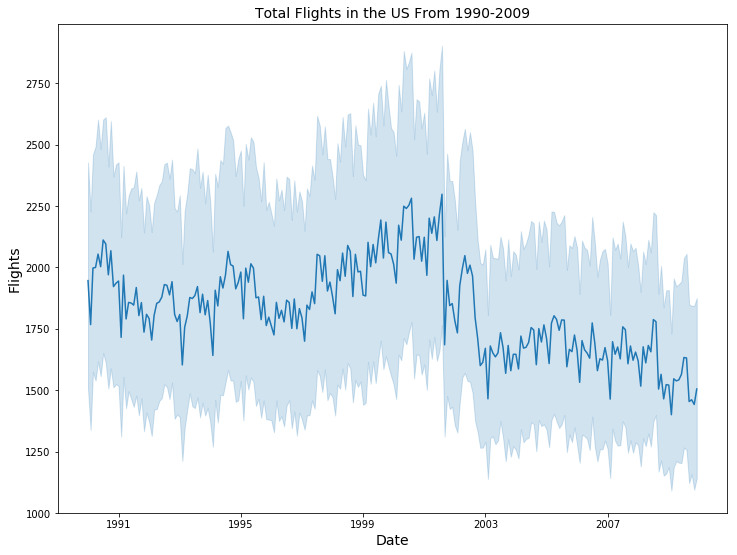

In [46]:
fig, ax = plt.subplots(figsize=(12, 9))
ax = sns.lineplot(x=total_flights_out_df['Date (yyyymm) of Flight'], \
                  y=total_flights_out_df['Flights'], data=total_flights_out_df)
plt.title('Total Flights in the US From 1990-2009', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Flights', fontsize=14)
plt.show()
fig.savefig('total_flights.png')

In [24]:
chicago_flights_df = summed_df.loc[summed_df['Origin City'] == 'Chicago, IL', :].reset_index()
chicago_flights_df = chicago_flights_df.drop(['index'], axis=1)
chicago_flights_df.head()

,Origin Airport Code,Destination Airport Code,Origin City,Destination City,Distance,Date (yyyymm) of Flight,Origin Pop,Destination Pop,Passengers,Seats,Flights
0,CGX,SPI,"Chicago, IL","Springfield, IL",176.0,199104,16550288,192857,1055,2489,131
1,CGX,SPI,"Chicago, IL","Springfield, IL",176.0,199105,16550288,192857,1198,2774,146
2,CGX,SPI,"Chicago, IL","Springfield, IL",176.0,199106,16550288,192857,1325,2432,128
3,CGX,SPI,"Chicago, IL","Springfield, IL",176.0,199107,16550288,192857,630,1615,85
4,CGX,SPI,"Chicago, IL","Springfield, IL",176.0,199108,16550288,192857,717,1406,74


In [25]:
chicago_flights_df = chicago_flights_df.groupby(['Origin City', 'Destination City'])\
                                                ['Flights'].agg(['sum', 'mean']).reset_index()
chicago_flights_df.head()

,Origin City,Destination City,sum,mean
0,"Chicago, IL","Abilene, TX",34,1.062500
1,"Chicago, IL","Akron, OH",19118,89.336449
2,"Chicago, IL","Albany, NY",55246,177.639871
3,"Chicago, IL","Albuquerque, NM",25246,68.603261
4,"Chicago, IL","Alexandria, LA",7,1.166667


In [26]:
chicago_flights_df['Dest City'], chicago_flights_df['Dest State'] = \
    chicago_flights_df['Destination City'].str.split(', ', 1).str
chicago_flights_df.head()

,Origin City,Destination City,sum,mean,Dest City,Dest State
0,"Chicago, IL","Abilene, TX",34,1.062500,Abilene,TX
1,"Chicago, IL","Akron, OH",19118,89.336449,Akron,OH
2,"Chicago, IL","Albany, NY",55246,177.639871,Albany,NY
3,"Chicago, IL","Albuquerque, NM",25246,68.603261,Albuquerque,NM
4,"Chicago, IL","Alexandria, LA",7,1.166667,Alexandria,LA


In [28]:
chicago_flights_df = chicago_flights_df[['Dest City', 'Dest State', 'sum', 'mean']]
chicago_flights_df.head()

,Dest City,Dest State,sum,mean
0,Abilene,TX,34,1.062500
1,Akron,OH,19118,89.336449
2,Albany,NY,55246,177.639871
3,Albuquerque,NM,25246,68.603261
4,Alexandria,LA,7,1.166667


In [29]:
chicago_flights_df = chicago_flights_df.rename(columns={'sum' : 'Total Flights 1990-2009', 'mean' : 'Average Flights 1990-2009'})
chicago_flights_df.head()

,Dest City,Dest State,Total Flights 1990-2009,Average Flights 1990-2009
0,Abilene,TX,34,1.062500
1,Akron,OH,19118,89.336449
2,Albany,NY,55246,177.639871
3,Albuquerque,NM,25246,68.603261
4,Alexandria,LA,7,1.166667


In [30]:
chicago_flights_df = chicago_flights_df.rename(columns={'Dest State': 'Destination State', 'Dest City' : 'Destination City'})
chicago_flights_df.head()

,Destination City,Destination State,Total Flights 1990-2009,Average Flights 1990-2009
0,Abilene,TX,34,1.062500
1,Akron,OH,19118,89.336449
2,Albany,NY,55246,177.639871
3,Albuquerque,NM,25246,68.603261
4,Alexandria,LA,7,1.166667


In [31]:
chicago_state_flights_sum_df = chicago_flights_df.groupby(['Destination State'])['Total Flights 1990-2009'].agg(['sum']).reset_index()
chicago_state_flights_sum_df

,Destination State,sum
0,AK,40062
1,AL,36320
2,AR,41307
3,AZ,162525
4,CA,626020
5,CO,22930
6,CT,91171
7,DC,249209
8,DE,198
9,FL,377834


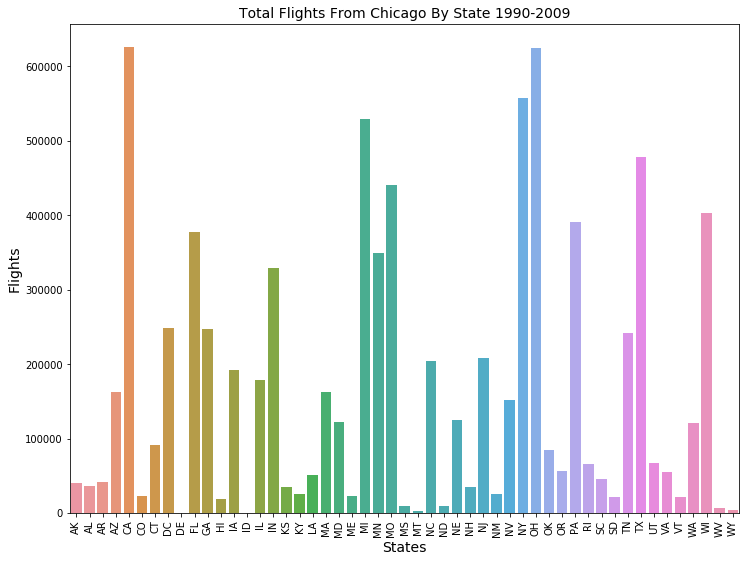

In [47]:
fig, ax = plt.subplots(figsize=(12, 9))
sns.barplot(x=chicago_state_flights_sum_df['Destination State'], y=chicago_state_flights_sum_df['sum'], data=chicago_state_flights_sum_df)
plt.xticks(rotation=90)
plt.title('Total Flights From Chicago By State 1990-2009', fontsize=14)
plt.xlabel('States', fontsize=14)
plt.ylabel('Flights', fontsize=14)
plt.show()
fig.savefig('Chicago_flights_by_state.png')

In [49]:
trunc_summed_df = summed_df.groupby(['Origin City', 'Date (yyyymm) of Flight', 'Destination City'])\
['Passengers', 'Seats', 'Flights'].agg(['sum']).reset_index()
trunc_summed_df.columns = trunc_summed_df.columns.droplevel(1)
trunc_summed_df = trunc_summed_df.rename(columns={'Passengers' : 'Total Passengers', 'Seats' : 'Total Seats', 'Flights' : 'Total Flights'})
trunc_summed_df.head()

,Origin City,Date (yyyymm) of Flight,Destination City,Total Passengers,Total Seats,Total Flights
0,"Aberdeen, SD",199110,"Elko, NV",70,119,1
1,"Aberdeen, SD",199202,"Elko, NV",113,119,1
2,"Aberdeen, SD",199311,"Billings, MT",100,100,1
3,"Aberdeen, SD",199505,"Elko, NV",124,124,1
4,"Aberdeen, SD",199707,"Minneapolis, MN",1856,2035,55


In [45]:
trunc_summed_df.shape

(1049302, 6)